# yfinance
---

## Q.
- 각자 한종목의 데이터를 선택
- open, close, high, low 컬럼의 값들을 소수점 2번자리까지 반올림 유지
- NaN 값이 존재하면, 이를 시가로 변경
- 파생변수 등락폭(종가-시가) 생성
- 등락율(등락폭 / 시가 * 100) 파생변수 생성
- 시가 / 종가 / 등락폭 / 볼륨 데이터를 시각화하여 표시 subplot 4개의 그래프 생성

In [223]:
import yfinance as yf
import pandas as pd

In [224]:
df_ks = yf.download('003490.KS', start='2019-01-01', end='2020-01-01')
df_ks_copy = df_ks

[*********************100%***********************]  1 of 1 completed


In [225]:
df_ks_copy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,32950.0,32950.0,32050.0,32400.0,32400.0,349580
2019-01-03,32700.0,32950.0,31650.0,31800.0,31800.0,464995
2019-01-04,31650.0,32450.0,31300.0,32350.0,32350.0,424001
2019-01-07,32600.0,33500.0,32300.0,33500.0,33500.0,619120
2019-01-08,33550.0,34050.0,32900.0,33900.0,33900.0,515749
...,...,...,...,...,...,...
2019-12-23,27800.0,29700.0,27200.0,29100.0,29100.0,1847155
2019-12-24,29150.0,29800.0,27750.0,28000.0,28000.0,1066768
2019-12-26,27600.0,28200.0,27600.0,27900.0,27900.0,352610


In [226]:
df_ks_copy["월"] = df_ks_copy["Open"]
df_ks_copy["월"] = pd.to_datetime(df_ks_copy.index, format="%Y-%m-%d %H:%M:%S").month.to_list()
df_ks_copy["월"] = df_ks_copy["월"].astype("str") + "월"

In [227]:
df_ks_copy

,Open,High,Low,Close,Adj Close,Volume,월
Date,,,,,,,
2019-01-02,32950.0,32950.0,32050.0,32400.0,32400.0,349580,1월
2019-01-03,32700.0,32950.0,31650.0,31800.0,31800.0,464995,1월
2019-01-04,31650.0,32450.0,31300.0,32350.0,32350.0,424001,1월
2019-01-07,32600.0,33500.0,32300.0,33500.0,33500.0,619120,1월
2019-01-08,33550.0,34050.0,32900.0,33900.0,33900.0,515749,1월
...,...,...,...,...,...,...,...
2019-12-23,27800.0,29700.0,27200.0,29100.0,29100.0,1847155,12월
2019-12-24,29150.0,29800.0,27750.0,28000.0,28000.0,1066768,12월
2019-12-26,27600.0,28200.0,27600.0,27900.0,27900.0,352610,12월


In [228]:
# df_ks_copy[["open", "High", "Low", "Close"]] = round(df_ks_copy[["open", "High", "Low", "Close"]],2)

df_ks_copy["Open"] = round(df_ks_copy["Open"],2)
df_ks_copy["High"] = round(df_ks_copy["High"],2)
df_ks_copy["Low"] = round(df_ks_copy["Low"],2)
df_ks_copy["Close"] = round(df_ks_copy["Close"],2)

In [229]:
df_ks_copy.isna().sum()
#Nan값 없음 확인

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
월            0
dtype: int64

In [230]:
#등락폭 파생변수 생성
df_ks_copy["등락폭"] = df_ks_copy["Close"] - df_ks_copy["Open"]


In [231]:
#등략률 파생변수 생성
df_ks_copy["등락률"] = df_ks_copy["등락폭"] / df_ks_copy["Open"] * 100

## plot

In [232]:
# pip install matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [233]:
# #시가 / 종가 / 등락폭 / 볼륨
# # x = df_ks_copy.index.to_list()
# y1 = df_ks_copy["Open"].to_list()
# y2 = df_ks_copy["Close"].to_list()
# y3 = df_ks_copy["등락폭"].to_list()
# y4 = df_ks_copy["Volume"].to_list()

#시가 / 종가 / 등락폭 / 볼륨
x = df_ks_copy.index.to_list()
y1 = df_ks_copy.groupby("월").mean()["Open"]
y2 = df_ks_copy.groupby("월").mean()["Close"]
y3 = df_ks_copy.groupby("월").mean()["등락폭"]
y4 = df_ks_copy.groupby("월").mean()["Volume"]

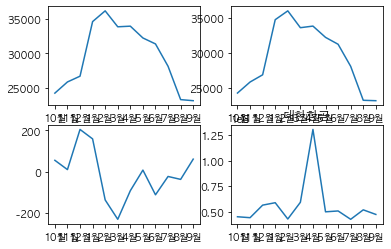

In [234]:
# subplot(a,b,c) -> a행, b열로 공간을 나눈 뒤 c번째 공간을 쓰자.
plt.subplot(2,2,1)
plt.plot(y1)

plt.subplot(2,2,2)
plt.plot(y2)

plt.subplot(2,2,3)
plt.plot(y3)

plt.subplot(2,2,4)
plt.plot(y4)

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# plt.plot(x,y, "--r")    # "--r"은 점선
# plt.plot(x, [4,2,6,4], "oy")    # "oy"는 노랑점
# plt.xlabel("Class")
# plt.ylabel("Count")
plt.title("대한항공")  #제목
# plt.legend(["시가","종가","등락폭","볼륨"], loc=1)    #legend는 범례추가. loc는 위치지정
plt.show()

# uriage.csv
- 파일로드
- purchase_date 컬럼을 시계열 데이털 변경
- item_name 컬럼의 값들을 다 대문자 변경
- item_name 컬럼의 값들의 공백 다 삭제(좌우 띄어쓰기 전부 삭제)
- item_name을 기준으로 오름차순 정렬
- 인덱스 재지정
- 결측치의 값을 확인

In [235]:
df_uriage = pd.read_csv("../csv/uriage.csv")
df_uriage

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현
...,...,...,...,...
2994,2019-02-15 2:56,상품Y,2500.0,김정민
2995,2019-06-22 4:03,상품M,1300.0,김재원
2996,2019-03-29 11:14,상품Q,NaN,김지율
2997,2019-07-14 12:56,상품H,NaN,김승주


In [236]:
df_uriage["purchase_date"] = pd.to_datetime(df_uriage["purchase_date"])

In [237]:
df_uriage

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-07-13 13:05:00,상 품 S,NaN,김우찬
2,2019-05-11 19:42:00,상 품 a,NaN,김유찬
3,2019-02-12 23:40:00,상품Z,2600.0,김재현
4,2019-04-22 03:09:00,상품a,NaN,김강현
...,...,...,...,...
2994,2019-02-15 02:56:00,상품Y,2500.0,김정민
2995,2019-06-22 04:03:00,상품M,1300.0,김재원
2996,2019-03-29 11:14:00,상품Q,NaN,김지율
2997,2019-07-14 12:56:00,상품H,NaN,김승주


In [238]:
df_uriage["item_name"] = df_uriage["item_name"].str.upper()

In [239]:
df_uriage["item_name"].replace(" ", "")

0         상품A
1       상 품 S
2       상 품 A
3         상품Z
4         상품A
        ...  
2994      상품Y
2995      상품M
2996      상품Q
2997      상품H
2998      상품D
Name: item_name, Length: 2999, dtype: object

In [240]:
def Reple(x):
        return x.replace(" ", "")

df_uriage["item_name"] = df_uriage["item_name"].apply(Reple)

In [241]:
df_uriage.sort_values(["item_name"],ascending=True, inplace=True)

In [242]:
df_uriage = df_uriage.reset_index()

In [243]:
df_uriage.isna().sum()

index              0
purchase_date      0
item_name          0
item_price       387
customer_name      0
dtype: int64

## Q.
## 결측치의 값에 해당하는 item_name들의 item_price의 값으로 치환
---

In [244]:
df_uriage

,index,purchase_date,item_name,item_price,customer_name
0,0,2019-06-13 18:02:00,상품A,100.0,김가온
1,1748,2019-05-19 20:22:00,상품A,100.0,김시훈
2,223,2019-06-25 08:13:00,상품A,100.0,김유진
3,1742,2019-06-13 16:03:00,상품A,100.0,김건희
4,1738,2019-02-10 00:28:00,상품A,100.0,김하랑
...,...,...,...,...,...
2994,2880,2019-04-22 00:36:00,상품Y,NaN,김동욱
2995,2881,2019-04-30 14:21:00,상품Y,NaN,김하준
2996,1525,2019-01-24 10:27:00,상품Y,2500.0,김범준
2997,1361,2019-05-28 13:45:00,상품Y,2500.0,김수현


In [245]:
fig_null = df_uriage["item_price"].isna()
fig_null

0       False
1       False
2       False
3       False
4       False
        ...  
2994     True
2995     True
2996    False
2997    False
2998    False
Name: item_price, Length: 2999, dtype: bool

In [246]:
# df_uriage.loc[fig_null] #
name_list = df_uriage.loc[fig_null, 'item_name'].unique()
name_list

array(['상품A', '상품B', '상품C', '상품D', '상품E', '상품F', '상품G', '상품H', '상품I',
       '상품J', '상품K', '상품L', '상품M', '상품N', '상품O', '상품P', '상품Q', '상품R',
       '상품S', '상품T', '상품U', '상품V', '상품W', '상품X', '상품Y'], dtype=object)

- '~'연산자 -> 부정
- ~False = True, ~True = False

In [247]:
df_uriage.loc[(~fig_null) & (df_uriage["item_name"] == '상품A'), "item_price"].max()

# ~fig_nill은 결측치가 아닌 정상값.

100.0

In [248]:
for name in list(name_list):
    price = df_uriage.loc[(~fig_null) & (df_uriage["item_name"] == name), "item_price"].mean()
    df_uriage.loc[(fig_null) & (df_uriage["item_name"] == name), "item_price"] = price


In [249]:
df_uriage.isna().sum()

index            0
purchase_date    0
item_name        0
item_price       0
customer_name    0
dtype: int64